In [44]:
#dependencies
!pip install seaborn
!pip install nbformat

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [46]:
%run ./DataCollectionAndCleaning.ipynb

test


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

df = pd.read_csv('./cardio_train.csv')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [27]:
def categorize_bp(ap_hi, ap_lo):
    if ap_hi < 90 and ap_lo < 60:
        return 'low'
    elif ap_hi < 120 and ap_lo < 80:
        return 'normal'
    elif 120 <= ap_hi < 130 and ap_lo < 80:
        return 'elevated'
    elif 130 <= ap_hi < 140 or 80 <= ap_lo < 90:
        return 'high_blood_pressure_stage_1'
    elif 140 <= ap_hi < 180 or 90 <= ap_lo < 120:
        return 'high_blood_pressure_stage_2'
    elif ap_hi >= 180 or ap_lo >= 120:
        return 'hypertensive_crisis'
    else:
        return 'unclassified'


In [28]:
def categorize_gluc(gluc):
    if gluc == 1:
        return 'normal'
    elif gluc == 2:
        return 'above_normal'
    else:
        return 'high'

In [29]:
def categorize_chlor(chlor):
    if chlor == 1:
        return 'normal'
    elif chlor == 2:
        return 'above_normal'
    else:
        return 'high'


In [30]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif bmi < 24.9:
        return 'normal_weight'
    elif bmi < 29.9:
        return 'overweight'
    elif bmi <39.9:
        return 'obese'
    else:
        return 'severe_obese'

In [31]:

df['bp_category'] = df.apply(lambda x: categorize_bp(x['ap_hi'], x['ap_lo']), axis=1)
df['gluc_category'] = df['gluc'].apply(categorize_gluc)
df['chlor_category'] = df['cholesterol'].apply(categorize_chlor)
df['age_years'] = df['age'] // 365
df['BMI'] = df['weight'] / (df['height'] / 100) ** 2
df['bmi_category'] = df['BMI'].apply(categorize_bmi)
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df['lifestyle_score'] = (1 - df['smoke']) + (1 - df['alco']) + df['active']

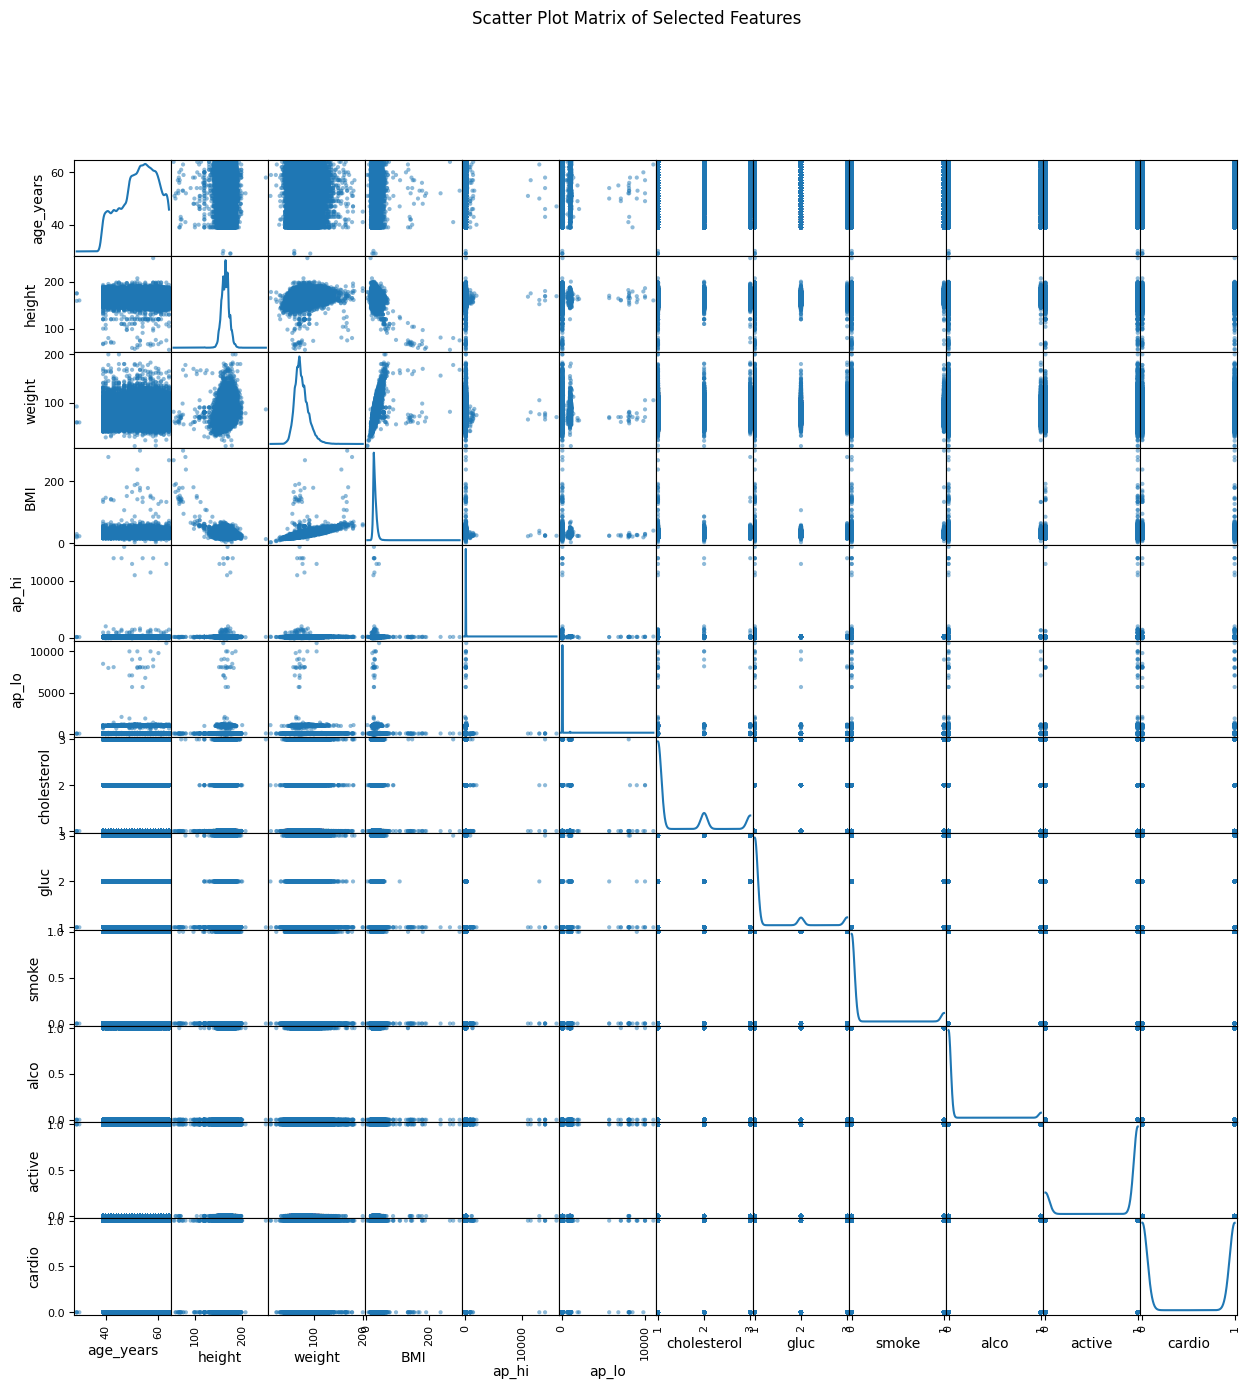

In [33]:


# Scatter plot matrix for the dataset with the new columns
scatter_matrix(df[['age_years', 'height', 'weight', 'BMI', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']], figsize=(15, 15), diagonal='kde')
plt.suptitle('Scatter Plot Matrix of Selected Features')
plt.show()

In [34]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'bp_category', 'gluc_category', 'chlor_category', 'age_years', 'BMI',
       'bmi_category', 'pulse_pressure', 'lifestyle_score'],
      dtype='object')

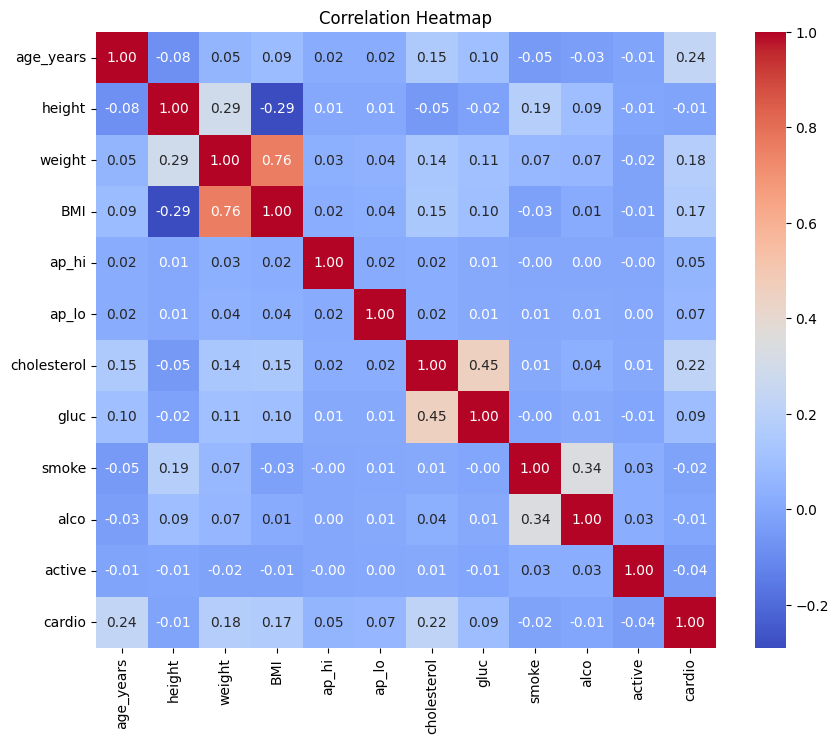

In [35]:
plt.figure(figsize=(10, 8))
corr = df[['age_years', 'height', 'weight', 'BMI', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

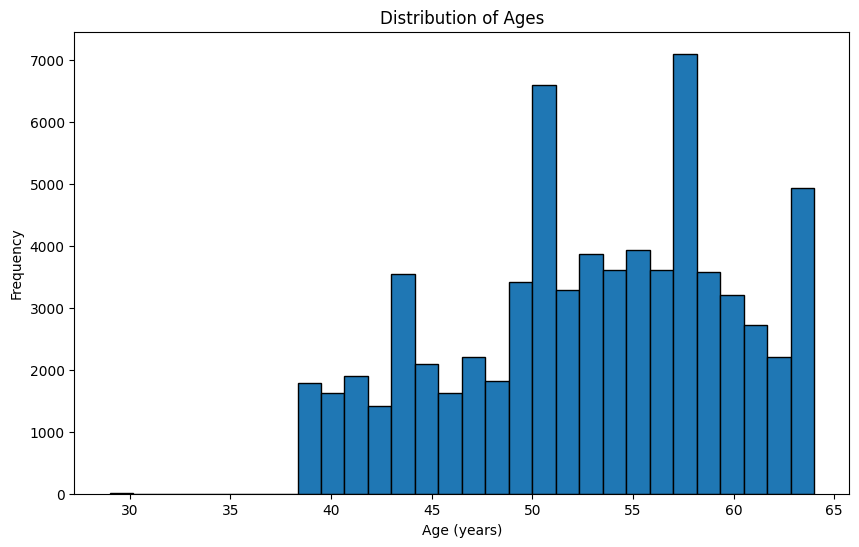

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['age_years'], bins=30, edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

In [37]:
std_analysis = df.describe().loc['std']

std_analysis.sort_values(ascending=False)

id                 28851.302323
age                 2467.251667
pulse_pressure       241.469638
ap_lo                188.472530
ap_hi                154.011419
weight                14.395757
height                 8.210126
age_years              6.766774
BMI                    6.091511
cholesterol            0.680250
gluc                   0.572270
lifestyle_score        0.567540
cardio                 0.500003
gender                 0.476838
active                 0.397179
smoke                  0.283484
alco                   0.225568
Name: std, dtype: float64

In [38]:
mean_analysis = df.describe().loc['mean']
mean_analysis.sort_values(ascending=False)

id                 49972.419900
age                19468.865814
height               164.359229
ap_hi                128.817286
ap_lo                 96.630414
weight                74.205690
age_years             52.840671
pulse_pressure        32.186871
BMI                   27.556513
lifestyle_score        2.661829
cholesterol            1.366871
gender                 1.349571
gluc                   1.226457
active                 0.803729
cardio                 0.499700
smoke                  0.088129
alco                   0.053771
Name: mean, dtype: float64

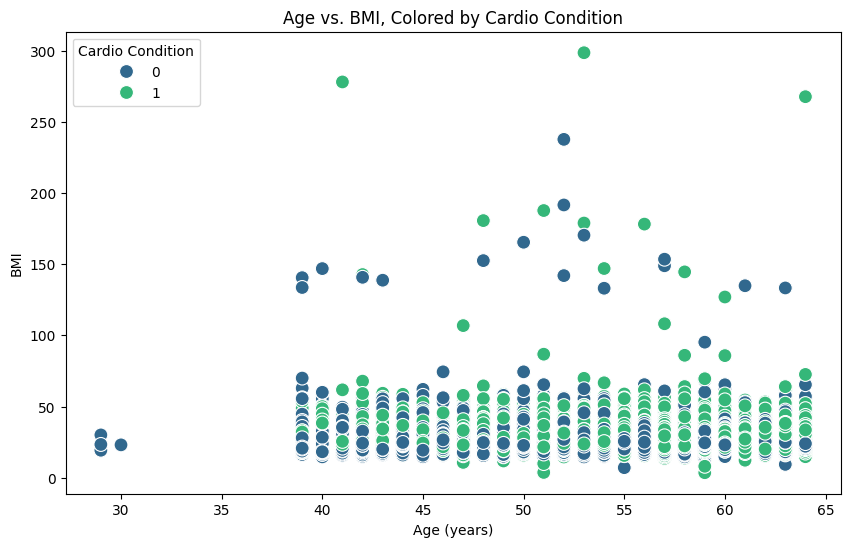

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age_years', y='BMI', hue='cardio', palette='viridis', s=100)
plt.title('Age vs. BMI, Colored by Cardio Condition')
plt.xlabel('Age (years)')
plt.ylabel('BMI')
plt.legend(title='Cardio Condition')
plt.show()

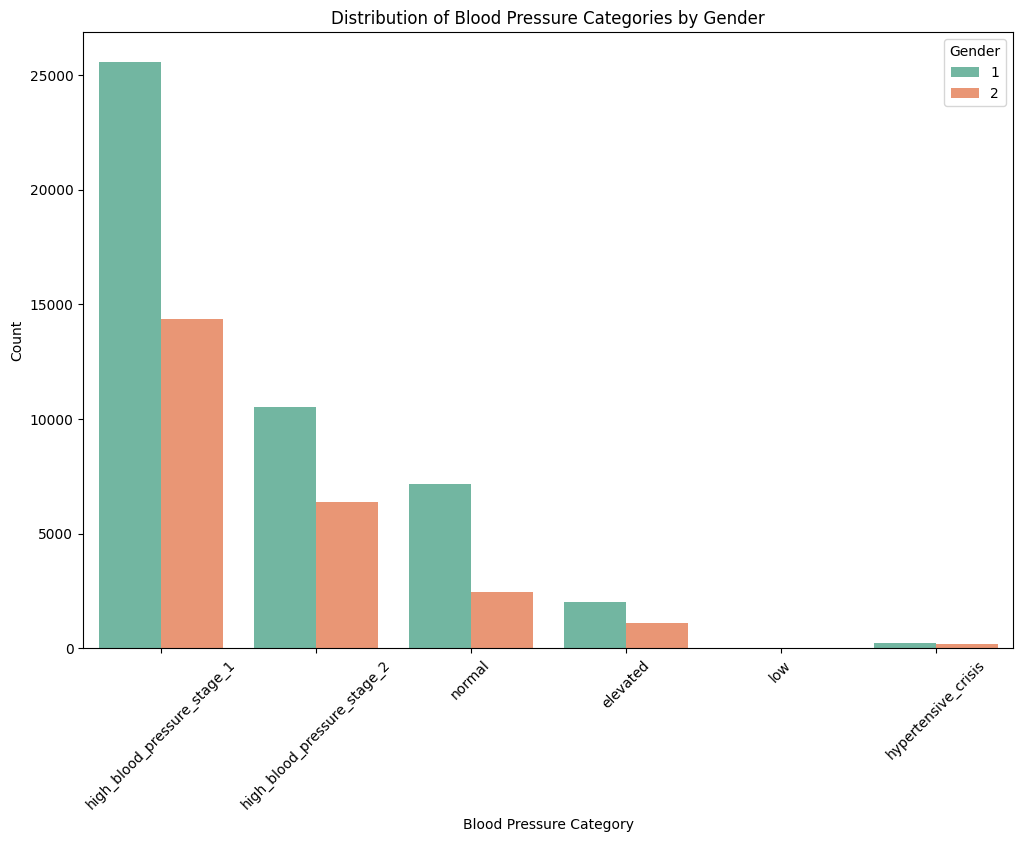

In [40]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='bp_category', hue='gender', palette='Set2')
plt.title('Distribution of Blood Pressure Categories by Gender')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

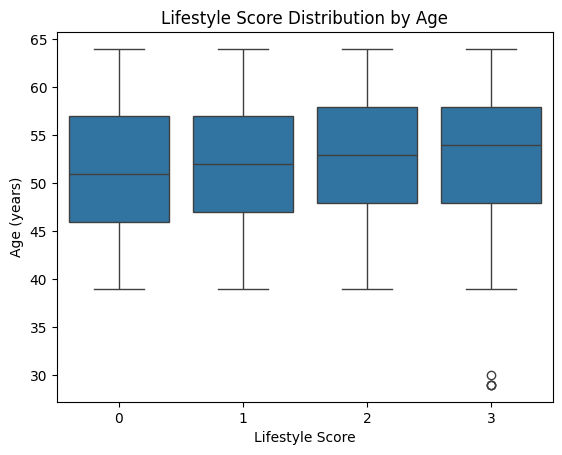

In [41]:
sns.boxplot(data=df, x='lifestyle_score', y='age_years')
plt.title('Lifestyle Score Distribution by Age')
plt.xlabel('Lifestyle Score')
plt.ylabel('Age (years)')

plt.show()


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

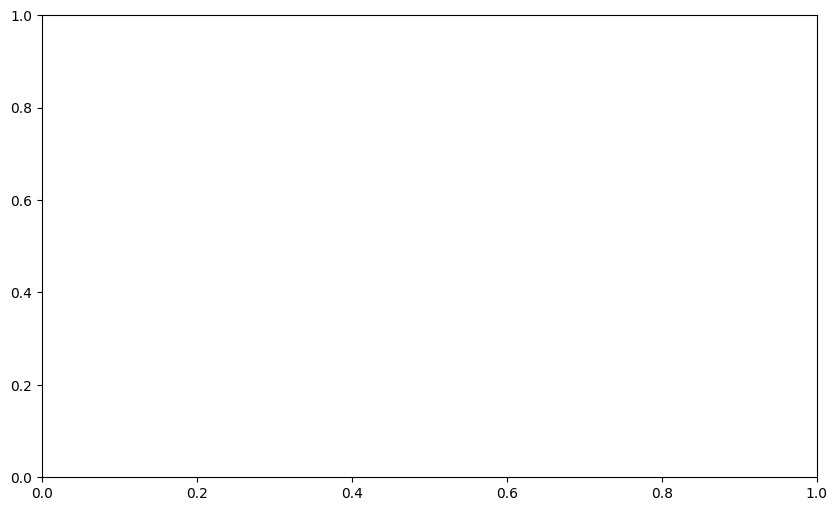